In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing the lybraries

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import string
from textblob import TextBlob
from multiprocessing import Pool
from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Reading the csv in pandas

df = pd.read_csv('Metrocar_User_Reviews.csv', usecols=['review'])

In [5]:
# Function to preprocess a single review

def preprocess_review(review):
    # Tokenize review and remove stopwords and unwanted characters
    tokens = [word for word in word_tokenize(review) if word.lower() not in stop_words and word.isalnum()]
    return tokens

In [6]:
# List of English stopwords

stop_words = set(stopwords.words('english'))

In [7]:
# Preprocess all reviews and add sentiment scores

df['review_tokens'] = df['review'].apply(preprocess_review)
df['sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
# Summarize the results

mean_sentiment = df['sentiment'].mean()
print(f"Mean Sentiment: {mean_sentiment}")

min_sentiment = df['sentiment'].min()
print(f"Min Sentiment: {min_sentiment}")

max_sentiment = df['sentiment'].max()
print(f"Max Sentiment: {max_sentiment}")

Mean Sentiment: -0.5405142119604645
Min Sentiment: -1.0
Max Sentiment: 0.05


In [9]:
# Function to extract adjectives and nouns

def extract_adjectives_and_nouns(tokens):
    tagged_tokens = pos_tag(tokens)
    adjectives = [word for word, pos in tagged_tokens if pos.startswith('JJ')]
    nouns = [word for word, pos in tagged_tokens if pos.startswith('NN')]
    return adjectives, nouns

In [10]:
# Apply the function to the DataFrame

df['adjectives'], df['nouns'] = zip(*df['review_tokens'].apply(extract_adjectives_and_nouns))

In [11]:
# Combine adjectives and nouns from all reviews into a single list

all_adjectives = [adj for adjectives in df['adjectives'] for adj in adjectives]
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]

# Count the occurrences of adjectives and nouns
adjective_counts = Counter(all_adjectives)
noun_counts = Counter(all_nouns)

# Get the 10 most common adjectives and nouns
top_20_adj = adjective_counts.most_common(20)
top_20_nouns = noun_counts.most_common(20)

# Print the results
print("top_20_adj:")
for word, count in top_20_adj:
    print(f"{word}: {count}")

print("top_20_nouns:")
for word, count in top_20_nouns:
    print(f"{word}: {count}")

top_20_adj:
unprofessional: 9376
uncomfortable: 9312
complete: 4751
last: 4751
unfamiliar: 4751
disappointed: 4717
Horrible: 4686
reckless: 4686
nightmare: 4668
rude: 4668
terrible: 4668
Unreliable: 4659
disgusted: 4650
Terrible: 4624
find: 4624
alternative: 4624
Unacceptable: 4595
disrespectful: 4595
wrong: 4559
poor: 4549
top_20_nouns:
driver: 32636
ride: 14017
Metrocar: 13823
experience: 9292
service: 9281
car: 9227
disaster: 4751
minute: 4751
location: 4751
limit: 4686
condition: 4668
issue: 4650
means: 4624
transportation: 4624
vehicle: 4595
dirty: 4595
Worst: 4559
route: 4559
Unsafe: 4549
driving: 4549


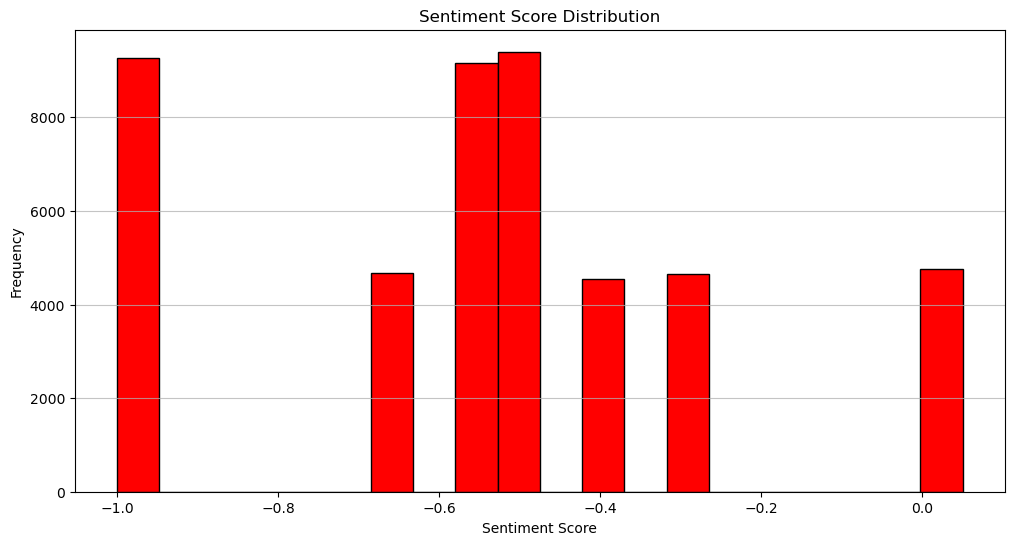

In [12]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=20, color='red', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

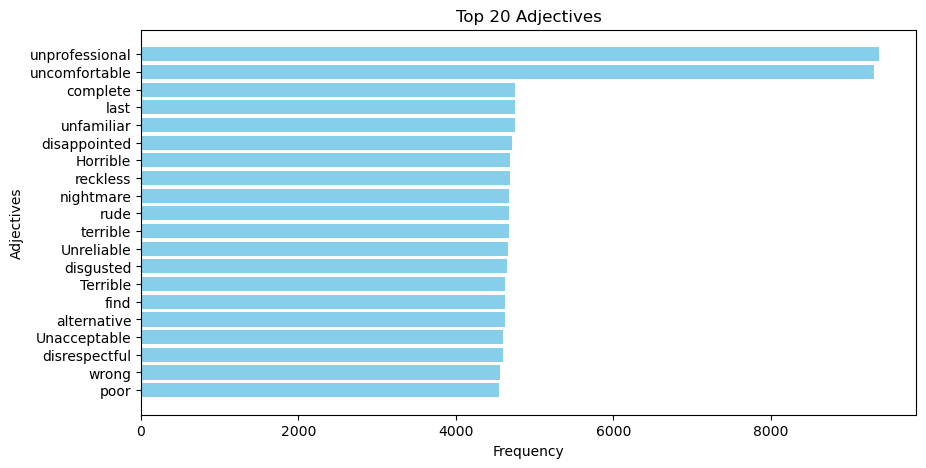

In [13]:
# Plot the top adjectives
plt.figure(figsize=(10, 5))
plt.barh([word for word, _ in top_20_adj], [count for _, count in top_20_adj], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Adjectives')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')

plt.show()

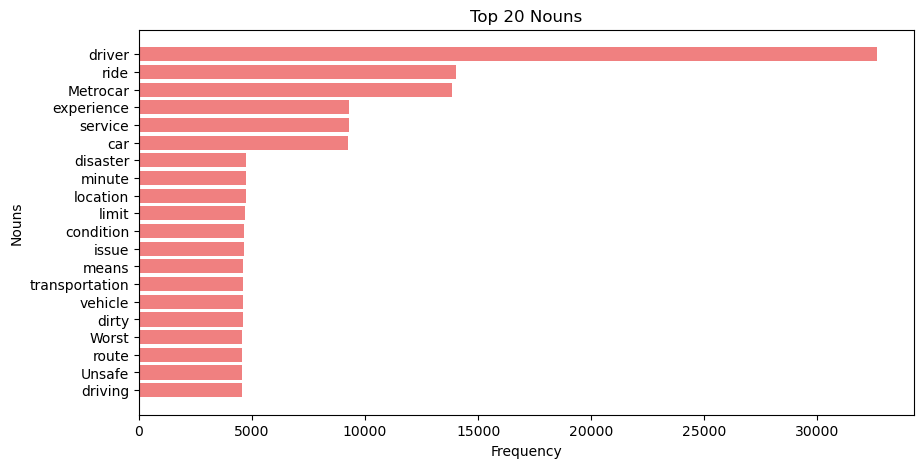

In [14]:
# Plot the top nouns
plt.figure(figsize=(10, 5))
plt.barh([word for word, _ in top_20_nouns], [count for _, count in top_20_nouns], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('Top 20 Nouns')
plt.xlabel('Frequency')
plt.ylabel('Nouns')

# Show the plot
plt.show()